### Time-Dependent Schrödinger Equation (TDSE) and Econophysics

The Time-Dependent Schrödinger Equation (TDSE) is a cornerstone of quantum mechanics, describing how quantum states evolve over time. In the realm of quantum econophysics, this equation can be adapted to model the dynamic behavior of economic systems, offering a unique perspective on how market conditions and financial indicators evolve. By interpreting quantum states as representations of economic states, the TDSE provides a framework for understanding and predicting the time evolution of complex economic systems.

In this context, the quantum state might correspond to various economic indicators, such as market volatility, interest rates, or asset prices. These states evolve under the influence of a Hamiltonian, which can be thought of as the operator representing the forces acting on the economic system—such as policy changes, market sentiment, or external economic shocks. The Hamiltonian in quantum econophysics serves as an analogue to factors that drive market dynamics, dictating how the system evolves over time.

The TDSE allows us to model the time evolution of these economic states with remarkable precision. As the quantum state evolves, it can represent different market conditions at different points in time, providing insights into potential future states based on current dynamics. This is particularly valuable for modeling scenarios in which the market is subject to multiple, interacting influences that might be too complex to analyze using classical methods alone.

A critical aspect of this approach is the concept of time evolution governed by the Hamiltonian. In quantum mechanics, the time evolution operator, which is derived from the Hamiltonian, dictates how the quantum state changes over time. Similarly, in quantum econophysics, this operator can simulate the progression of economic states under various conditions, helping us to explore potential outcomes in a dynamic and uncertain environment.

For instance, if we consider the initial state of an economic system as a stable market condition, the TDSE can simulate how this state changes as it encounters various influences represented by the Hamiltonian. The resulting evolution might show how a stable market can become volatile or how it might react to a significant economic event, such as a change in interest rates or a geopolitical shock. The ability to simulate these changes using quantum principles provides a powerful tool for understanding and predicting complex economic behavior.

Moreover, the interpretation of quantum states in this context also allows for the examination of probabilities associated with different market outcomes. Just as in quantum mechanics, where the square of the wave function gives the probability distribution of finding a particle in a particular state, the application of TDSE in quantum econophysics can provide a probabilistic view of potential economic states. This probabilistic framework is particularly useful in dealing with the inherent uncertainty and stochastic nature of financial markets.

In summary, the application of the Time-Dependent Schrödinger Equation in quantum econophysics represents a novel approach to understanding the time evolution of economic systems. By leveraging the principles of quantum mechanics, we can gain deeper insights into the dynamics of markets and financial indicators, offering new ways to predict and manage economic outcomes in an increasingly complex world. This integration of quantum theory with economic modeling is not just a theoretical exercise but a potential stepping stone toward more sophisticated and accurate tools for economic forecasting and analysis.

##### Time-Dependent  Schrödinger Equation 

$$
i \hbar \frac{\partial}{\partial t} \psi(x,t) = \hat{H} \psi(x,t)
$$

Here, $\hat{H}$ is the Hamiltonian operator representing the total energy of the system. This could be adapted in quantum econophysics to describe the evolution of economic states over time.

In [1]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from scipy.linalg import expm
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Parameters
dt = 0.1  # Time step
t_max = 1.0  # Maximum time
num_steps = int(t_max / dt)

In [3]:
# Define a simple Hamiltonian (for instance, a Pauli-Z operator)
H = np.array([[1, 0], [0, -1]])  # Could represent a simplified market dynamic

In [4]:
# Initial quantum state (e.g., initial market condition)
initial_state = np.array([1, 0])  # |0> state

In [5]:
# Time evolution operator U = exp(-i * H * dt)
U = expm(-1j * H * dt)

In [6]:
# Initialize the quantum circuit with 1 qubit
qc = QuantumCircuit(1)

In [7]:
# Initialize the state
qc.initialize(initial_state, 0)

In [8]:
# Apply time evolution for each time step
for _ in range(num_steps):
    qc.unitary(U, [0], label='U(t)')

In [9]:
# Print the circuit
print(qc)

   ┌─────────────────┐┌──────┐┌──────┐┌──────┐┌──────┐┌──────┐┌──────┐┌──────┐»
q: ┤ Initialize(1,0) ├┤ U(t) ├┤ U(t) ├┤ U(t) ├┤ U(t) ├┤ U(t) ├┤ U(t) ├┤ U(t) ├»
   └─────────────────┘└──────┘└──────┘└──────┘└──────┘└──────┘└──────┘└──────┘»
«   ┌──────┐┌──────┐┌──────┐
«q: ┤ U(t) ├┤ U(t) ├┤ U(t) ├
«   └──────┘└──────┘└──────┘


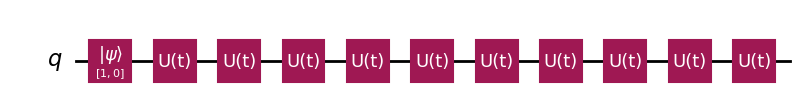

In [10]:
# Visualize the circuit
qc.draw('mpl')
plt.show()

In [11]:
# Simulate the quantum state after time evolution
simulator =AerSimulator()
qc.save_statevector()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()

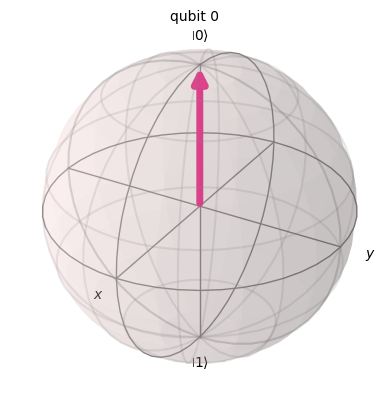

In [12]:
# Get the statevector and plot the Bloch sphere
statevector = result.get_statevector()
plot_bloch_multivector(statevector).show()

In [13]:
# Measure the qubit
qc.measure_all()

In [14]:
# Simulate the measurement
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()
counts = result.get_counts()

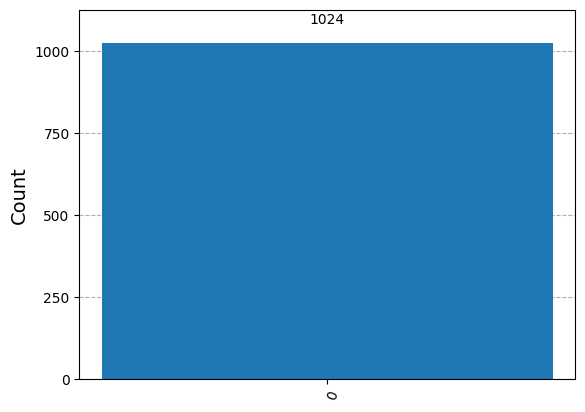

In [15]:
# Plot the results as a histogram
plot_histogram(counts).show()